In [77]:
import streamlit as st
import pandas as pd
import re
from urlextract import URLExtract
from wordcloud import WordCloud
import pandas as pd
from collections import Counter
import emoji
import matplotlib.pyplot as plt
# import matplotlib
# matplotlib.use('Agg')
import plotly.express as px
import seaborn as sns

Validate Regex : https://regex101.com/

# Data Cleaning

In [5]:
# Closing the file in important for preventing data access later and for other programs to access the file also.
f = open("_chat.txt")
data = f.read()
f.close()

In [6]:
data

'[15/12/19, 7:02:32 PM] Movie for every year 😴😴: \u200eMessages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them.\n[15/12/19, 7:02:32 PM] Nilay 2nd Floor: \u200eNilay 2nd Floor created this group\n[15/12/19, 7:02:32 PM] Movie for every year 😴😴: \u200eYou were added\n[10/04/22, 3:46:11 PM] Ashish Yadav Amity: Bhai bhai koi free hai its urgent 😦\n[10/04/22, 3:46:18 PM] Ashish Yadav Amity: Koi hai bhai 😵\n[10/04/22, 3:47:49 PM] Ritesh Amity: Mai hun bhai\n[10/04/22, 3:48:58 PM] Ashish Yadav Amity: Bhai mere system pe ransomware attack hogya hai\n[10/04/22, 3:49:05 PM] Ashish Yadav Amity: Kya kru ab 😭\n[10/04/22, 3:49:14 PM] Ritesh Amity: Ye kaise ho gaya\n[10/04/22, 3:49:26 PM] Ritesh Amity: Nilay ko call Karo\n[10/04/22, 3:49:30 PM] Ritesh Amity: Mujhe iska idea kam hai\n[10/04/22, 3:49:39 PM] Ashish Yadav Amity: Are yarr crack download kiya tha recovery software ka\n[10/04/22, 3:49:41 PM] Ritesh Amity: Bhai kahin SSD lagwaye 

In [7]:
# For AM, PM Formatted Time
pattern = "\[\d{1,2}/\d{1,2}/\d{1,2},\s\d{1,2}:\d{1,2}:\d{1,2}\s[APap][Mm]\]\s"

In [8]:
message = re.split(pattern, data)[1:]

In [9]:
dates = re.findall(pattern, data)

In [10]:
df = pd.DataFrame({'user_message':message, 'date':dates})

- %d matches the day of the month.
- %m matches the month.
- %y matches the two-digit year.
- %I matches the hour (12-hour clock).
- %M matches the minutes.
- %S matches the seconds.
- %p matches "AM" or "PM" in a case-insensitive manner.

In [11]:
df['date'] = pd.to_datetime(df['date'],format='[%d/%m/%y, %I:%M:%S %p] ')

In [12]:
df.head(10)

,user_message,date
0,Movie for every year 😴😴: ‎Messages and calls a...,2019-12-15 19:02:32
1,Nilay 2nd Floor: ‎Nilay 2nd Floor created this...,2019-12-15 19:02:32
2,Movie for every year 😴😴: ‎You were added\n,2019-12-15 19:02:32
3,Ashish Yadav Amity: Bhai bhai koi free hai its...,2022-04-10 15:46:11
4,Ashish Yadav Amity: Koi hai bhai 😵\n,2022-04-10 15:46:18
5,Ritesh Amity: Mai hun bhai\n,2022-04-10 15:47:49
6,Ashish Yadav Amity: Bhai mere system pe ransom...,2022-04-10 15:48:58
7,Ashish Yadav Amity: Kya kru ab 😭\n,2022-04-10 15:49:05
8,Ritesh Amity: Ye kaise ho gaya\n,2022-04-10 15:49:14
9,Ritesh Amity: Nilay ko call Karo\n,2022-04-10 15:49:26


In [13]:
df.shape

(17884, 2)

In [14]:
# Separting user and message
users = []
messages = []
for message in df['user_message']:
    line = re.split('([\w\W]+?):\s', message)
    users.append(line[1])
    messages.append(line[2])
df['user'] = users
df['message'] = messages
df.drop(columns='user_message', inplace=True)

In [15]:
df.head()

,date,user,message
0,2019-12-15 19:02:32,Movie for every year 😴😴,‎Messages and calls are end-to-end encrypted. ...
1,2019-12-15 19:02:32,Nilay 2nd Floor,‎Nilay 2nd Floor created this group\n
2,2019-12-15 19:02:32,Movie for every year 😴😴,‎You were added\n
3,2022-04-10 15:46:11,Ashish Yadav Amity,Bhai bhai koi free hai its urgent 😦\n
4,2022-04-10 15:46:18,Ashish Yadav Amity,Koi hai bhai 😵\n


In [16]:
df.isnull().sum()

date       0
user       0
message    0
dtype: int64

In [17]:
#Extracting Years, Months, Days
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month_name()
df['day'] = df['date'].dt.day
df['hour'] = df['date'].dt.hour
df['minute'] = df['date'].dt.minute

In [18]:
df.head(10)

,date,user,message,year,month,day,hour,minute
0,2019-12-15 19:02:32,Movie for every year 😴😴,‎Messages and calls are end-to-end encrypted. ...,2019,December,15,19,2
1,2019-12-15 19:02:32,Nilay 2nd Floor,‎Nilay 2nd Floor created this group\n,2019,December,15,19,2
2,2019-12-15 19:02:32,Movie for every year 😴😴,‎You were added\n,2019,December,15,19,2
3,2022-04-10 15:46:11,Ashish Yadav Amity,Bhai bhai koi free hai its urgent 😦\n,2022,April,10,15,46
4,2022-04-10 15:46:18,Ashish Yadav Amity,Koi hai bhai 😵\n,2022,April,10,15,46
5,2022-04-10 15:47:49,Ritesh Amity,Mai hun bhai\n,2022,April,10,15,47
6,2022-04-10 15:48:58,Ashish Yadav Amity,Bhai mere system pe ransomware attack hogya hai\n,2022,April,10,15,48
7,2022-04-10 15:49:05,Ashish Yadav Amity,Kya kru ab 😭\n,2022,April,10,15,49
8,2022-04-10 15:49:14,Ritesh Amity,Ye kaise ho gaya\n,2022,April,10,15,49
9,2022-04-10 15:49:26,Ritesh Amity,Nilay ko call Karo\n,2022,April,10,15,49


In [19]:
# Removeing Group Name it's alays at postion 0
users_list = df["user"].unique().tolist()
if len(users_list) > 2:
    users_list.remove(users_list[0])
print(users_list)

['Nilay 2nd Floor', 'Ashish Yadav Amity', 'Ritesh Amity', 'Aayush', '\u200eYou']


# Exploratory Data Analysis

In [20]:
users_list = df["user"].unique().tolist()

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17884 entries, 0 to 17883
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     17884 non-null  datetime64[ns]
 1   user     17884 non-null  object        
 2   message  17884 non-null  object        
 3   year     17884 non-null  int32         
 4   month    17884 non-null  object        
 5   day      17884 non-null  int32         
 6   hour     17884 non-null  int32         
 7   minute   17884 non-null  int32         
dtypes: datetime64[ns](1), int32(4), object(3)
memory usage: 838.4+ KB


In [22]:
selected_user = 'Aayush'

In [23]:
len(df[df["user"] == selected_user]["message"])

4320

In [24]:
words = []
for word in df[df["user"]==selected_user]["message"]:
    for i in word.split():
        words.append(i)
num_words = len(words)
num_words

18757

### Media shared in group

In [25]:
df[df["message"].str.contains(r'omitted',case=False, regex=True)]["message"].value_counts().reset_index().head(10)

,message,count
0,‎sticker omitted\n,645
1,‎image omitted\n‎,596
2,‎image omitted\n,579
3,‎sticker omitted\n‎,515
4,‎video omitted\n,78
5,‎GIF omitted\n,64
6,‎video omitted\n‎,43
7,‎GIF omitted\n‎,40
8,‎audio omitted\n,5
9,‎Contact card omitted\n,4


In [26]:
df[df["message"].str.contains(r'omitted',case=False, regex=True)]["message"].value_counts().sum()

2596

### Most active users

In [27]:
active_users = df["user"].value_counts()[df["user"].value_counts()>10].reset_index()

In [28]:
active_users

,user,count
0,Nilay 2nd Floor,5712
1,Ashish Yadav Amity,4760
2,Aayush,4320
3,Ritesh Amity,3082


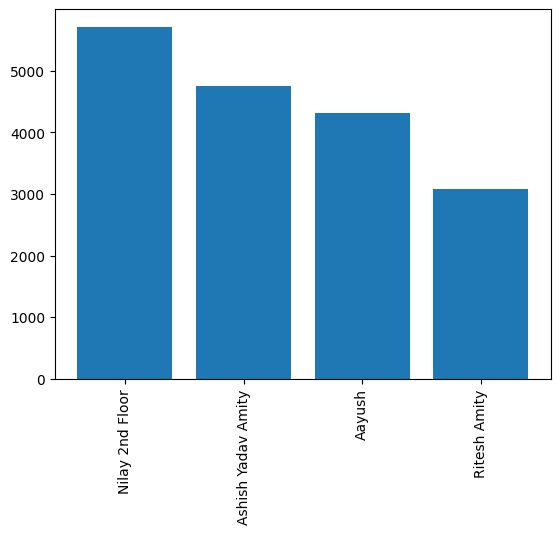

In [29]:
active_plot = plt.bar(active_users["user"], active_users["count"])
plt.xticks(rotation="vertical")
plt.show()

Conclusion: Most active user in Nilay

### Msg Sent based on percent

In [30]:
overall_active_user_df = round(df["user"].value_counts()[df["user"].value_counts()>10]/df.shape[0]*100).reset_index().rename(columns={'user':'Name', 'count':'Percent'})
overall_active_user_df

,Name,Percent
0,Nilay 2nd Floor,32.0
1,Ashish Yadav Amity,27.0
2,Aayush,24.0
3,Ritesh Amity,17.0


([0, 1, 2, 3],
 [Text(0, 0, 'Nilay 2nd Floor'),
  Text(1, 0, 'Ashish Yadav Amity'),
  Text(2, 0, 'Aayush'),
  Text(3, 0, 'Ritesh Amity')])

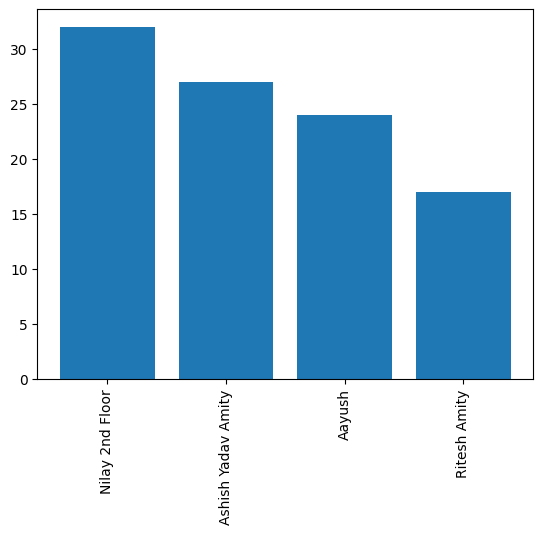

In [31]:
plt.bar(overall_active_user_df["Name"],overall_active_user_df["Percent"])
plt.xticks(rotation='vertical')

- Nilay has 32 percent countribution

### Wordcloud and Frequencies

In [32]:
message_data = df['message'].str.cat(sep=' ')
message_data = message_data.lower()
message_data = re.sub('[^a-zA-Z]', ' ', message_data)
message_data = re.sub('\s+',' ', message_data)

In [33]:
# To view in DF
message_data_df = pd.DataFrame(message_data.split(), columns=["Words"])
message_data_df = message_data_df.value_counts().reset_index()
message_data_df.head(10)

,Words,count
0,hai,3052
1,omitted,2596
2,bhai,2444
3,to,1838
4,sticker,1194
5,image,1183
6,me,1051
7,mai,975
8,nahi,943
9,bhi,934


In [34]:
#importing the stopwords
stopwords_file = open('stopwords.txt')
stopwords = stopwords_file.read()
stopwords_file.close()
all_stopwords = stopwords.split() + ['haa','kr', 'omitted', 'sticker', 'image', 'https', 'www']

In [35]:
# filtered message data after removing stopwordss
filtered_text_data = []
for word in message_data.split():
    if word.lower() not in all_stopwords:
        filtered_text_data.append(word)
filtered_text_data = " ".join(filtered_text_data)

In [36]:
# To view in filtered DF
filtered_text_df = pd.DataFrame(filtered_text_data.split(), columns=["Words"])
filtered_text_df = filtered_text_df.value_counts().reset_index()
filtered_text_df.head(10)

,Words,count
0,nilay,448
1,ashish,227
2,call,226
3,aa,224
4,video,185
5,baat,180
6,tumhe,174
7,aayush,172
8,ritesh,164
9,time,160


In [37]:
filtered_text_df["Freq. %"] = round((filtered_text_df["count"]/filtered_text_df["count"].sum())*100,2)
filtered_text_df.head(15)

,Words,count,Freq. %
0,nilay,448,1.14
1,ashish,227,0.58
2,call,226,0.57
3,aa,224,0.57
4,video,185,0.47
5,baat,180,0.46
6,tumhe,174,0.44
7,aayush,172,0.44
8,ritesh,164,0.42
9,time,160,0.41


<BarContainer object of 15 artists>

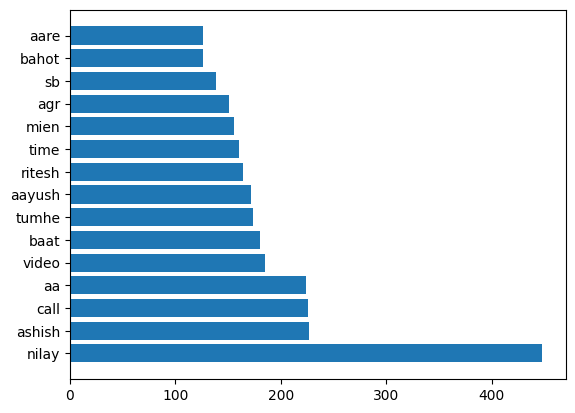

In [38]:
filtered_text_df = filtered_text_df.head(15)
plt.barh(filtered_text_df["Words"], filtered_text_df["count"])

In [39]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(filtered_text_data)

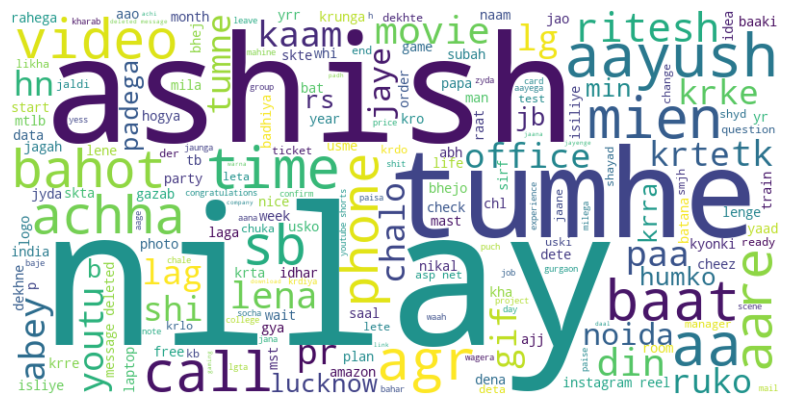

In [40]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Timeline Analysis

In [41]:
df['month_num'] = df["date"].dt.month

- Multi column in group by

In [42]:
df.groupby(['year','month_num']).count()

date  user  message  month   day  hour  minute
year month_num                                                
2019 12            3     3        3      3     3     3       3
2022 4           803   803      803    803   803   803     803
     5          1479  1479     1479   1479  1479  1479    1479
     6           776   776      776    776   776   776     776
     7          1498  1498     1498   1498  1498  1498    1498
     8          1029  1029     1029   1029  1029  1029    1029
     9          1330  1330     1330   1330  1330  1330    1330
     10         1095  1095     1095   1095  1095  1095    1095
     11          846   846      846    846   846   846     846
     12          849   849      849    849   849   849     849
2023 1          1077  1077     1077   1077  1077  1077    1077
     2          1365  1365     1365   1365  1365  1365    1365
     3           985   985      985    985   985   985     985
     4           376   376      376    376   376   376     376
     5          1075  1075     1075   1075  1075  1075    1075
     6          1141  1141     1141   1141  1141  1141    1141
     7          1081  1081     1081   1081  1081  1081    1081
     8           609   609      609    609   609   609     609
     9           456   456      456    456   456   456     456
     10           11    11       11     11    11    11      11

In [43]:
timeline_df = df.groupby(['year','month_num', 'month']).count()["message"].reset_index()[1:]
timeline_df

,year,month_num,month,message
1,2022,4,April,803
2,2022,5,May,1479
3,2022,6,June,776
4,2022,7,July,1498
5,2022,8,August,1029
6,2022,9,September,1330
7,2022,10,October,1095
8,2022,11,November,846
9,2022,12,December,849
10,2023,1,January,1077


- creating a time column with year and month for plotting

In [44]:
time = []
for i in range(1, timeline_df.shape[0]+1):
    time.append(timeline_df["month"][i] + '-' + str(timeline_df["year"][i]))
timeline_df['time'] = time
timeline_df

,year,month_num,month,message,time
1,2022,4,April,803,April-2022
2,2022,5,May,1479,May-2022
3,2022,6,June,776,June-2022
4,2022,7,July,1498,July-2022
5,2022,8,August,1029,August-2022
6,2022,9,September,1330,September-2022
7,2022,10,October,1095,October-2022
8,2022,11,November,846,November-2022
9,2022,12,December,849,December-2022
10,2023,1,January,1077,January-2023


#### Month Wise

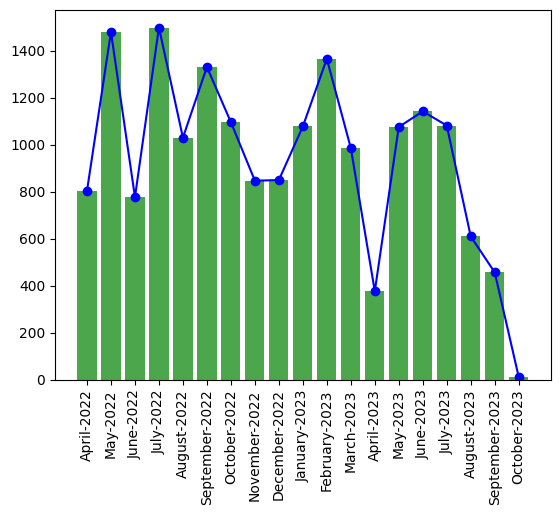

In [45]:
plt.bar(timeline_df['time'], timeline_df['message'], facecolor='green', alpha=0.7)
plt.scatter(timeline_df['time'], timeline_df['message'], color='blue', marker='o')
plt.plot(timeline_df['time'], timeline_df['message'], color='blue')
plt.xticks(rotation='vertical')
plt.show()

In [46]:
df['only_date'] = df['date'].dt.date

In [47]:
daily_timeline_df = df.groupby('only_date').count()["message"].reset_index()[1:]
daily_timeline_df.head(10)

,only_date,message
1,2022-04-10,58
2,2022-04-11,56
3,2022-04-12,56
4,2022-04-13,6
5,2022-04-14,34
6,2022-04-15,25
7,2022-04-16,3
8,2022-04-17,22
9,2022-04-18,4
10,2022-04-19,8


#### daily wise

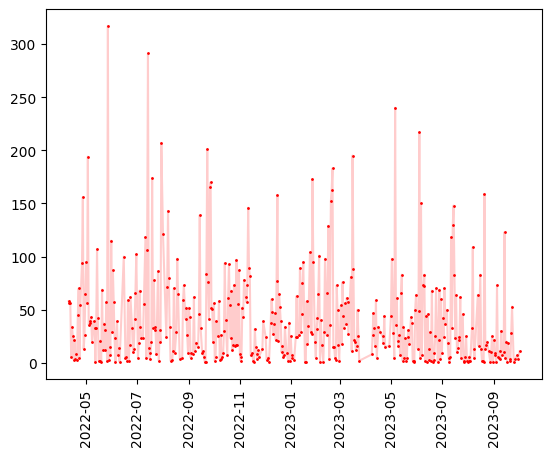

In [48]:
# plt.bar(daily_timeline_df['only_date'], daily_timeline_df['message'], facecolor='green', alpha=0.7)
plt.scatter(daily_timeline_df['only_date'], daily_timeline_df['message'], color='red', marker='o', s=1)
plt.plot(daily_timeline_df['only_date'], daily_timeline_df['message'], color='red', alpha=0.2)
plt.xticks(rotation='vertical')
plt.show()

#### weekdays wise

In [49]:
df['Weekday'] = df["date"].dt.day_name()
df.head()

,date,user,message,year,month,day,hour,minute,month_num,only_date,Weekday
0,2019-12-15 19:02:32,Movie for every year 😴😴,‎Messages and calls are end-to-end encrypted. ...,2019,December,15,19,2,12,2019-12-15,Sunday
1,2019-12-15 19:02:32,Nilay 2nd Floor,‎Nilay 2nd Floor created this group\n,2019,December,15,19,2,12,2019-12-15,Sunday
2,2019-12-15 19:02:32,Movie for every year 😴😴,‎You were added\n,2019,December,15,19,2,12,2019-12-15,Sunday
3,2022-04-10 15:46:11,Ashish Yadav Amity,Bhai bhai koi free hai its urgent 😦\n,2022,April,10,15,46,4,2022-04-10,Sunday
4,2022-04-10 15:46:18,Ashish Yadav Amity,Koi hai bhai 😵\n,2022,April,10,15,46,4,2022-04-10,Sunday


In [50]:
week_timeline_df = df['Weekday'].value_counts().reset_index()
week_timeline_df["Weekday"]
week_timeline_df["count"]

0    3024
1    2848
2    2648
3    2527
4    2408
5    2282
6    2147
Name: count, dtype: int64

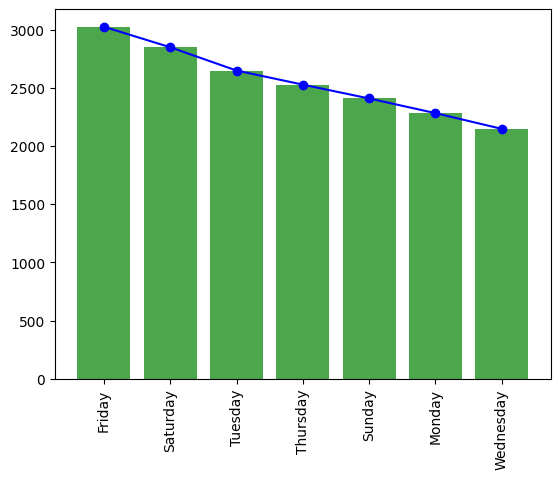

In [51]:
plt.bar(week_timeline_df["Weekday"], week_timeline_df["count"], facecolor='green', alpha=0.7)
plt.scatter(week_timeline_df["Weekday"], week_timeline_df["count"], color='blue', marker='o')
plt.plot(week_timeline_df["Weekday"], week_timeline_df["count"], color='blue')
plt.xticks(rotation='vertical')
plt.show()

In [57]:
df.head()

,date,user,message,year,month,day,hour,minute,month_num,only_date,Weekday
0,2019-12-15 19:02:32,Movie for every year 😴😴,‎Messages and calls are end-to-end encrypted. ...,2019,December,15,19,2,12,2019-12-15,Sunday
1,2019-12-15 19:02:32,Nilay 2nd Floor,‎Nilay 2nd Floor created this group\n,2019,December,15,19,2,12,2019-12-15,Sunday
2,2019-12-15 19:02:32,Movie for every year 😴😴,‎You were added\n,2019,December,15,19,2,12,2019-12-15,Sunday
3,2022-04-10 15:46:11,Ashish Yadav Amity,Bhai bhai koi free hai its urgent 😦\n,2022,April,10,15,46,4,2022-04-10,Sunday
4,2022-04-10 15:46:18,Ashish Yadav Amity,Koi hai bhai 😵\n,2022,April,10,15,46,4,2022-04-10,Sunday


In [70]:
period = []
for hour in df[['hour','Weekday']]['hour']:
    if hour == 23:
        period. append(str(hour) + "-" + str('00' ))
    elif hour == 0:
        period.append(str('00') + "-" + str(hour+1))
    else:
        period.append(str(hour) + "-" + str(hour+1))
df['period']=period

In [71]:
df.head()

,date,user,message,year,month,day,hour,minute,month_num,only_date,Weekday,period
0,2019-12-15 19:02:32,Movie for every year 😴😴,‎Messages and calls are end-to-end encrypted. ...,2019,December,15,19,2,12,2019-12-15,Sunday,19-20
1,2019-12-15 19:02:32,Nilay 2nd Floor,‎Nilay 2nd Floor created this group\n,2019,December,15,19,2,12,2019-12-15,Sunday,19-20
2,2019-12-15 19:02:32,Movie for every year 😴😴,‎You were added\n,2019,December,15,19,2,12,2019-12-15,Sunday,19-20
3,2022-04-10 15:46:11,Ashish Yadav Amity,Bhai bhai koi free hai its urgent 😦\n,2022,April,10,15,46,4,2022-04-10,Sunday,15-16
4,2022-04-10 15:46:18,Ashish Yadav Amity,Koi hai bhai 😵\n,2022,April,10,15,46,4,2022-04-10,Sunday,15-16


- added period for better understanding of duration

In [100]:
hour_timeline_df = df.groupby(['hour','period']).count()["message"].reset_index()
hour_timeline_df

,hour,period,message
0,0,00-1,356
1,1,1-2,228
2,2,2-3,164
3,3,3-4,72
4,4,4-5,54
5,5,5-6,33
6,6,6-7,127
7,7,7-8,230
8,8,8-9,273
9,9,9-10,506


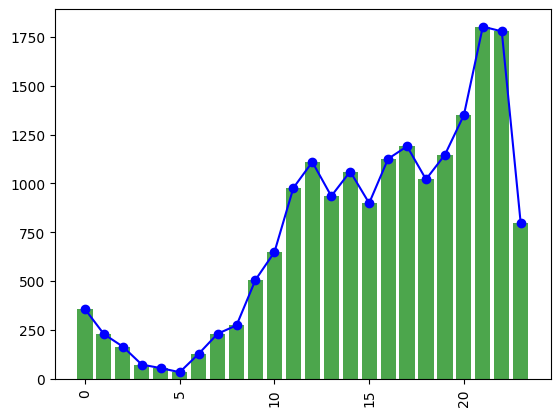

In [99]:
plt.bar(hour_timeline_df["hour"], hour_timeline_df["message"], facecolor='green', alpha=0.7)
plt.scatter(hour_timeline_df["hour"], hour_timeline_df["message"], color='blue', marker='o')
plt.plot(hour_timeline_df["hour"], hour_timeline_df["message"], color='blue')
plt.xticks(rotation='vertical')
plt.show()

In [88]:
heatmap_df = df.pivot_table(index='Weekday', columns='period', values='message', aggfunc='count')
heatmap_df

period,00-1,1-2,10-11,11-12,12-13,13-14,14-15,15-16,16-17,17-18,...,21-22,22-23,23-00,3-4,4-5,5-6,6-7,7-8,8-9,9-10
Weekday,,,,,,,,,,,,,,,,,,,,,
Friday,96.0,35.0,57.0,184.0,329.0,180.0,120.0,158.0,80.0,147.0,...,200.0,391.0,80.0,5.0,3.0,4.0,8.0,49.0,28.0,296.0
Monday,20.0,10.0,126.0,192.0,100.0,152.0,130.0,149.0,87.0,105.0,...,273.0,146.0,110.0,3.0,NaN,2.0,13.0,39.0,69.0,32.0
Saturday,14.0,9.0,74.0,114.0,164.0,97.0,146.0,104.0,332.0,193.0,...,463.0,299.0,158.0,31.0,1.0,4.0,20.0,3.0,29.0,27.0
Sunday,85.0,6.0,30.0,131.0,163.0,132.0,135.0,169.0,186.0,93.0,...,186.0,213.0,80.0,24.0,42.0,8.0,33.0,89.0,91.0,33.0
Thursday,27.0,1.0,176.0,114.0,163.0,156.0,190.0,170.0,137.0,114.0,...,206.0,273.0,199.0,1.0,1.0,5.0,39.0,20.0,9.0,26.0
Tuesday,96.0,107.0,158.0,163.0,120.0,56.0,181.0,48.0,207.0,401.0,...,198.0,195.0,105.0,3.0,1.0,6.0,10.0,17.0,12.0,75.0
Wednesday,18.0,60.0,27.0,79.0,71.0,162.0,159.0,101.0,97.0,137.0,...,277.0,262.0,63.0,5.0,6.0,4.0,4.0,13.0,35.0,17.0


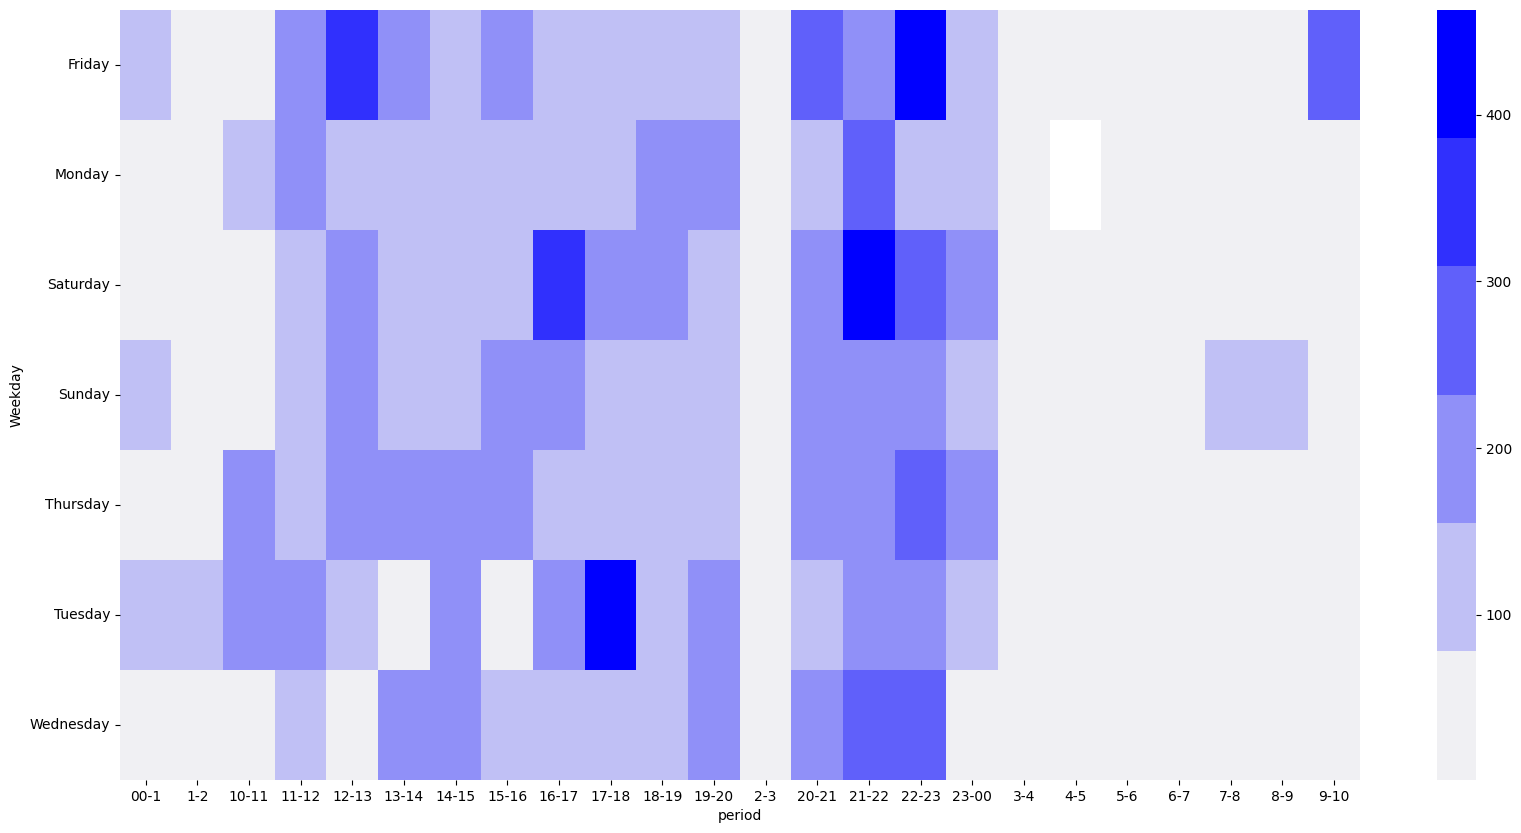

In [96]:
plt.figure(figsize=(20,10))
light_palette = sns.color_palette("light:b")
sns.heatmap(heatmap_df, cmap=light_palette)
plt.yticks(rotation='horizontal')
plt.show()

#### Individual level information

In [129]:
user_most_active_hour = df[df["user"]=='Nilay 2nd Floor'].groupby('hour').count()["message"].sort_values(ascending=False).reset_index()["hour"][1]

In [139]:
user_most_active_weekday = df[df["user"]=='Nilay 2nd Floor'].groupby('Weekday').count()["message"].sort_values(ascending=False).reset_index()["Weekday"][1]

In [160]:
active_users = df["user"].value_counts()[df["user"].value_counts()>10].reset_index()
active_users[active_users.user=='Aayush'].index[0]

2